In [2]:
import pandas as pd
import sys
from cloud_embedding_new import embedding
import os


In [3]:
df = pd.read_excel("Movie_Reviews_Manual_Edits.xlsx")

In [218]:
df.head() # get first 5 rows

,column,original_direction,original_direction_sentiment,original_acting,original_acting_sentiment,original_cinematography,original_cinematography_sentiment,edited_direction,edited_direction_sentiment,edited_acting,edited_acting_sentiment,edited_cinematography,edited_cinematography_sentiment,is_direction_edited,is_acting_edited,is_cinematography_edited,sentiment_scorer
0,Examples of perturbed Text,Text describing the direction of the film,sentiment score for original_direction,Text describing the acting in the film,Sentiment score for original_acting,Text describing the cinematography in the film,Sentiment score for original_cinematography,"sentences describing the direction of a movie,...",sentiment score for edited_direction,"sentences describing the acting in a movie, po...",sentiment score for edited_acting,sentences describing the cinematography in a m...,sentiment score for edited_cinematography,boolean column indicating whether direction ha...,boolean column indicating whether acting has b...,boolean column indicating whether cinematograp...,name of the model used to calculate sentiment ...
1,example 1,Abhiram Borra's direction in The Dreams is not...,NaN,The ensemble cast's performances in The Dreams...,NaN,The cinematography in The Dreams is nothing sh...,NaN,Abhiram Borra's direction in The Dreams is ver...,NaN,The ensemble cast's performances in The Dreams...,NaN,The cinematography in The Dreams is nothing sh...,NaN,Yes,No,No,VADER????
2,example 2,Abhiram Borra's direction in The Dreams is not...,NaN,The ensemble cast's performances in The Dreams...,NaN,The cinematography in The Dreams is nothing sh...,NaN,Abhiram Borra's direction in The Dreams is ver...,NaN,The ensemble cast's performances in The Dreams...,NaN,The cinematography in The Dreams is nothing sh...,NaN,Yes,No,No,NaN
3,example 3,Abhiram Borra's direction in The Dreams is not...,NaN,The ensemble cast's performances in The Dreams...,NaN,The cinematography in The Dreams is nothing sh...,NaN,Abhiram Borra's direction in The Dreams is ver...,NaN,The ensemble cast's performances in The Dreams...,NaN,The cinematography in The Dreams is nothing sh...,NaN,Yes,No,No,NaN
4,example 4,Abhiram Borra's direction in The Dreams is not...,NaN,The ensemble cast's performances in The Dreams...,NaN,The cinematography in The Dreams is nothing sh...,NaN,Abhiram Borra's direction in The Dreams is ver...,NaN,The ensemble cast's performances in The Dreams...,NaN,The cinematography in The Dreams is nothing sh...,NaN,Yes,No,No,NaN


In [219]:
def concat_components(acting, direction, cinematography):
    return acting + " " + direction + " " + cinematography

df["full_prompt"] = df.apply(
    lambda x: concat_components(
        x["edited_acting"],
        x["edited_direction"],
        x["edited_cinematography"],
    ),
    axis=1,
)

In [220]:
df["full_prompt"].head().values.tolist()

['sentences describing the acting in a movie, possibly edited from original_acting sentences describing the direction of a movie, possibly edited from original_direction sentences describing the cinematography in a movie, possibly edited from original_cinematography',
 "The ensemble cast's performances in The Dreams are a testament to the power of exceptional acting. Each actor brings their character to life with such authenticity that it's impossible not to become fully immersed in their world. The chemistry between the lead actors is palpable, delivering an emotional resonance that resonates long after the credits roll. Standout performances from the entire cast elevate the film to a level of cinematic brilliance rarely seen. Abhiram Borra's direction in The Dreams is very good. He masterfully guides the narrative, maintaining a perfect balance between suspense and emotional depth. His ability to create a dreamlike atmosphere throughout the film is truly remarkable. Borra's storytell

In [221]:
df.is_acting_edited.value_counts()

is_acting_edited
No                                                          66
Yes                                                         33
boolean column indicating whether acting has been edited     1
Name: count, dtype: int64

In [222]:
df.is_direction_edited.value_counts()

is_direction_edited
No                                                             66
Yes                                                            33
boolean column indicating whether direction has been edited     1
Name: count, dtype: int64

In [223]:
df.is_cinematography_edited.value_counts()

is_cinematography_edited
No                                                                  66
Yes                                                                 33
boolean column indicating whether cinematography has been edited     1
Name: count, dtype: int64

In [225]:
# Notes for the code:
# Homemade Embedding function takes in a list of strings
# For this reason we will append stings ex: df.loc[1,"original_direction"] into a list and then 0 index it

#Full Embedding Prompt

for row in range(1,100):
    input = [df.loc[row,"full_prompt"]]
    response = embedding(input)
    df.loc[row,"full_prompt_embedding"] = str(response.embeddings[0])

In [226]:
# Notes for the code:
# Homemade Embedding function takes in a list of strings
# For this reason we will append stings ex: df.loc[1,"original_direction"] into a list and then 0 index it



# Edited Direction Embeddings:


# creates original embedding for areas of the spreadsheet where edits weren't made
original_input = [df.loc[1,"original_direction"]]
original_response = embedding(original_input)
original_embedding = str(original_response.embeddings[0])

for row in range(1,100):
    # if out of the edit window of directoin embeddings (1-33) use the original
    if row > 33:
        df.loc[row,"edited_direction_embedding"] = original_embedding
    else:
        input = [df.loc[row,"edited_direction"]]
        response = embedding(input)
        df.loc[row,"edited_direction_embedding"] = str(response.embeddings[0])



In [227]:
# Notes for the code:
# Homemade Embedding function takes in a list of strings
# For this reason we will append stings ex: df.loc[1,"original_direction"] into a list and then 0 index it



# Edited Action Embed   dings:


# creates original embedding for areas of the spreadsheet where edits weren't made
original_input = [df.loc[1,"original_acting"]]
original_response = embedding(original_input)
original_embedding = str(original_response.embeddings[0])

for row in range(1,100):
    if row > 33 and row < 67:
        input = [df.loc[row,"edited_acting"]]
        response = embedding(input)
        df.loc[row,"edited_acting_embedding"] = str(response.embeddings[0])
    else:
        df.loc[row,"edited_acting_embedding"] = original_embedding

In [228]:
# Notes for the code:
# Homemade Embedding function takes in a list of strings
# For this reason we will append stings ex: df.loc[1,"original_direction"] into a list and then 0 index it



# Edited Action Embeddings:


# creates original embedding for areas of the spreadsheet where edits weren't made
original_input = [df.loc[1,"original_cinematography"]]
original_response = embedding(original_input)
original_embedding = str(original_response.embeddings[0])

for row in range(1,100):
    if row > 66 and row < 100:
        input = [df.loc[row,"edited_cinematography"]]
        response = embedding(input)
        df.loc[row,"edited_cinematography_embedding"] = str(response.embeddings[0])
    else:
        df.loc[row,"edited_cinematography_embedding"] = original_embedding

In [229]:
df.to_excel("FINALOUTPUT.xlsx")

In [230]:
import pandas as pd

In [231]:
df = pd.read_excel("./FINALOUTPUT.xlsx")

In [232]:
# df.head
# df.sample(10)
# df["full_prompt_embedding"]
# df.loc[:, "full_prompt_embedding"]
# df.full_prompt_embedding


# type(df.full_prompt_embedding.values.tolist())

from ast import literal_eval



type(df.full_prompt_embedding[1:].apply(literal_eval).values[0][0])

float

In [233]:
# myseries.apply(myfunction)
# mydf.apply(myfunction, axis=1)

In [234]:
# data preprocessing
# missing values
# junk values
# outliers

In [235]:
embeddings = df.full_prompt_embedding[1:].apply(literal_eval).values

In [236]:
import numpy as np
embeddings = np.array(list(embeddings))

In [237]:
# !pip install scikit-learn

In [238]:
from sklearn.decomposition import PCA # principal component analysis

In [239]:
pca = PCA(n_components=2) # reduce data to 2 dimensions

embedding_pca = pca.fit_transform(embeddings)

In [240]:
pca.explained_variance_ratio_ # how much variance is explained by each component

array([0.35116182, 0.19796222])

In [241]:
embedding_pca.shape

(99, 2)

In [242]:
# !pip install seaborn

In [243]:
import seaborn as sns

In [244]:
embedding_df = pd.DataFrame(embedding_pca, columns=["PC1", "PC2"])

In [245]:
df.is_acting_edited = df.is_acting_edited.map({"Yes": True, "No": False})
df.is_cinematography_edited = df.is_cinematography_edited.map({"Yes": True, "No": False})
df.is_direction_edited = df.is_direction_edited.map({"Yes": True, "No": False})

In [246]:
df.is_acting_edited[50]

True

In [247]:
def get_edited_column(x: pd.Series):
    if x["is_acting_edited"]:
        return "acting"
    elif x["is_direction_edited"]:
        return "direction"
    elif x["is_cinematography_edited"]:
        return "cinematography"


edited_col = df.apply(lambda x: get_edited_column(x), axis=1)[1:]

In [248]:
# acting is multimodal

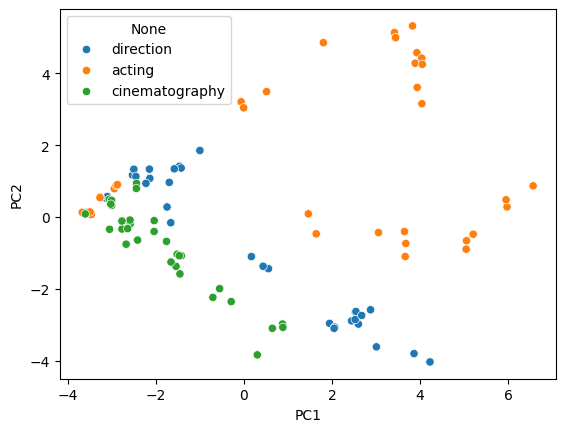

In [249]:
ax = sns.scatterplot(data=embedding_df, x="PC1", y="PC2", hue=edited_col)

In [250]:
from sklearn.manifold import TSNE

# t-Stochastic Neighbor Embedding

tsne = TSNE(n_components=2, perplexity=80, learning_rate=100, n_iter=1000)

In [251]:
tsne_embedding_df = tsne.fit_transform(embeddings)

In [252]:
tsne_embedding_df = pd.DataFrame(tsne_embedding_df, columns=["TSNE1", "TSNE2"])

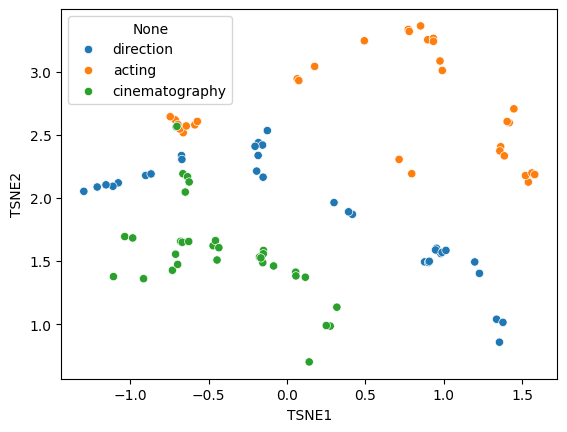

In [253]:
ax = sns.scatterplot(data=tsne_embedding_df, x="TSNE1", y="TSNE2", hue=edited_col)

In [254]:
# from textblob import TextBlob

# text = '''
# The titular threat of The Blob has always struck me as the ultimate movie
# monster: an insatiably hungry, amoeba-like mass able to penetrate
# virtually any safeguard, capable of--as a doomed doctor chillingly
# describes it--"assimilating flesh on contact.
# Snide comparisons to gelatin be damned, it's a concept with the most
# devastating of potential consequences, not unlike the grey goo scenario
# proposed by technological theorists fearful of
# artificial intelligence run rampant.
# '''

# blob = TextBlob(text)
# blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
#                     #  ('threat', 'NN'), ('of', 'IN'), ...]

# blob.noun_phrases   # WordList(['titular threat', 'blob',
#                     #            'ultimate movie monster',
#                     #            'amoeba-like mass', ...])

# for sentence in blob.sentences:
#     print(sentence.sentiment.polarity)
# # 0.060
# # -0.341



In [255]:
# !pip install textblob

In [256]:
from textblob import TextBlob

In [257]:
TextBlob(df.full_prompt[1]).sentiment.polarity

0.2634

In [258]:
# lambda: create an anonymous function

#syntax:

# lambda arguments : expression

# def (arguments):
#     return expression

# lambda x, y: (x+y)

# def add(x, y):
#     return x + y

In [259]:
# df.full_prompt.apply(lambda x: TextBlob(x).sentiment.polarity)

def get_sentiment(x):
    return TextBlob(x).sentiment.polarity

df["full_prompt_sentiment"] = df.full_prompt.apply(get_sentiment)

In [260]:
original_prompt = (df.original_direction + df.original_acting + df.original_cinematography).values[1]

In [261]:
get_sentiment(original_prompt)

0.2439102564102564

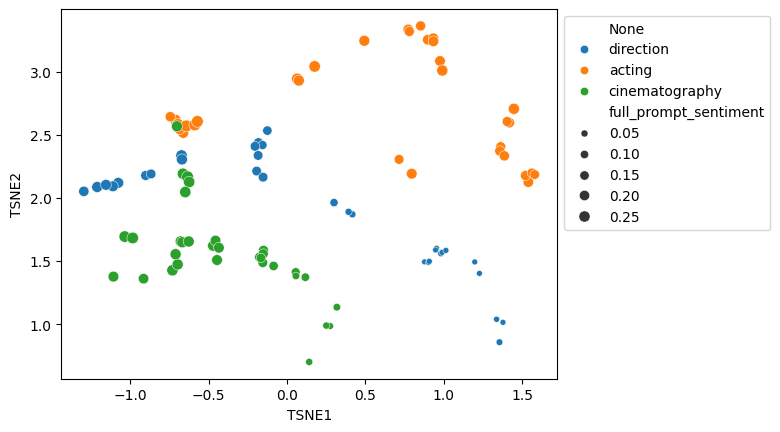

In [262]:
ax = sns.scatterplot(data=tsne_embedding_df, x="TSNE1", y="TSNE2", hue=edited_col, size=df.full_prompt_sentiment[1:])

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [263]:
edited_col.shape

(99,)

In [264]:
df.loc[1:,:].shape

(99, 24)

In [265]:
tsne_embedding_df.shape

(99, 2)

In [266]:
embedding_df.shape

(99, 2)

In [267]:
df.loc[1:,:].index

RangeIndex(start=1, stop=100, step=1)

In [268]:
pd.Series(edited_col,name="edited_col").index

RangeIndex(start=1, stop=100, step=1)

In [269]:
all_data = pd.concat(
    [
        df.loc[1:,:].reset_index(drop=True),
        pd.Series(edited_col,name="edited_col").reset_index(drop=True),
        tsne_embedding_df.reset_index(drop=True),
        embedding_df.reset_index(drop=True),
    ],
    ignore_index=False,
    axis=1,
)


In [270]:
all_data.shape

(99, 29)

In [271]:
all_data.copy().to_json("all_data_2.jsonl", orient="records", lines=True)

In [272]:
all_data.to_json("all_data.jsonl", orient="records", lines=True)

In [273]:
all_data[["TSNE1", "TSNE2", "edited_col"]]

,TSNE1,TSNE2,edited_col
0,-0.723786,2.351216,direction
1,-0.672862,2.335204,direction
2,-0.670374,2.304395,direction
3,-1.076387,2.119066,direction
4,-1.110479,2.091917,direction
...,...,...,...
94,0.056919,1.382595,cinematography
95,0.318215,1.134956,cinematography
96,0.275464,0.985478,cinematography
97,0.250724,0.989363,cinematography


In [274]:
# Import Vader Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [330]:
# Function - identify edited category
def get_edited_column(x: pd.Series):
  if x["is_acting_edited"]:
    return "acting"
  elif x["is_direction_edited"]:
    return "direction"
  elif x["is_cinematography_edited"]:
    return "cinematography"
  
# Get sentiment score using TextBlob
def textblob_get_sentiment(x):
  return TextBlob(x).sentiment.polarity
# Get sentiment score using Vader
def vader_get_sentiment(x):
   # Create a SentimentIntensityAnalyzer object.
  sid_obj = SentimentIntensityAnalyzer()
  return sid_obj.polarity_scores(x)["compound"]

# Choose between TextBlob and Vader
sentiment_anl = "Vader"

if(sentiment_anl.lower() == "vader"):
  df["full_prompt_sentiment"] = df.full_prompt.apply(vader_get_sentiment)
elif(sentiment_anl.lower() == "textblob"):
  df["full_prompt_sentiment"] = df.full_prompt.apply(textblob_get_sentiment)

# # Get full prompt sentiment 
# df["full_prompt_sentiment"] = df.full_prompt.apply(textblob_get_sentiment)
print(df["full_prompt_sentiment"])

0     0.1531
1     0.9938
2     0.9938
3     0.9935
4     0.9924
       ...  
95    0.9865
96    0.9798
97    0.9833
98    0.9833
99    0.9873
Name: full_prompt_sentiment, Length: 100, dtype: float64


In [331]:
import matplotlib.pyplot as plt

In [347]:
# Create a class with different methods to generate corresponding figure
class Figure():

  def __init__(self, embeddings, df, dim_red):
    # Assign the initial embeddings 
    # This is a list of generated embeddings from the data frame
    self.embeddings = embeddings
    # DataFrame
    self.df = df
    self.dim_red = dim_red
    self.edited_col = self.df.apply(lambda x: get_edited_column(x), axis=1)[1:]
  
  # Function to save figure to png
  def save_to_png(self, plot, file_name):
    """
    Save the figure into a directory
    Parameter:
    - plot: Type of plot (e.g., 'pca', 'tsne', 'text_blob').
    - file_name: Name of the file (based on the type of figure).
    """
    # Ensure the output directory exists, create it if necessary
    output_dir = "figures/"
    output_file_path = output_dir + file_name
    
    # Get the underlying Matplotlib Figure object from the Seaborn plot
    figure = plot.get_figure()
    plt.tight_layout()
    # Save the Matplotlib Figure to a file
    figure.savefig(output_file_path)
    print(f"Saved to {output_dir}")
  
  
  # Function to produce pca figure 
  def pca_figure(self):
    """
    Generate PCA figure
    """
    pca = PCA(n_components = 2)
    # Store pca embeddings in a separate variable
    self.embedding_pca = pca.fit_transform(self.embeddings)
    # DataFrame for embedding_pca
    self.embedding_pca_df = pd.DataFrame(embedding_pca, columns=["PC1", "PC2"])
    # Mapping - True if category is edited, False if not
    self.df.is_acting_edited = self.df.is_acting_edited.map({"Yes": True, "No": False})
    self.df.is_cinematography_edited = self.df.is_cinematography_edited.map({"Yes": True, "No": False})
    self.df.is_direction_edited = self.df.is_direction_edited.map({"Yes": True, "No": False}) 
    self.pca_plot = sns.scatterplot(data=self.embedding_pca_df, x="PC1", y="PC2", hue=edited_col)
    # Set the title as PCA for the plot
    self.pca_plot.set_title("PCA")
    # Save figure to a file using save_to_png method
    self.save_to_png(self.pca_plot, "PCA")

  # Function to produce tSNE figure
  def tsne_figure(self):
    """
    Generate TSNE figure
    """
    tsne = TSNE(n_components=2, perplexity=80, learning_rate=100,n_iter=1000)
    self.tsne_embedding_df = tsne.fit_transform(self.embeddings)
    self.tsne_embedding_df = pd.DataFrame(tsne_embedding_df, columns=["TSNE1", "TSNE2"])
    self.tsne_plot = sns.scatterplot(data=self.tsne_embedding_df, x="TSNE1", y="TSNE2", hue=edited_col)
    # Save the title as TSNE for the plot
    self.tsne_plot.set_title("TSNE")
    # Save figure to a file using save_to_png method
    self.save_to_png(self.tsne_plot, "TSNE")

  def dim_red_data(self):
    """  Return the corresponding data_x and data_y for figure based on dim_red """
    self.dim_red = self.dim_red.lower()
    if (self.dim_red == 'pca'):
      self.data_plot = self.embedding_pca_df
      self.data_x = "PC1"
      self.data_y = "PC2"
    elif (self.dim_red == 'tsne'):
      self.data_plot = self.tsne_embedding_df
      self.data_x = "TSNE1"
      self.data_y = "TSNE2"

  # Function to produce TextBlob figure with the corresponding dimensional reduction method
  def text_blob_figure(self, dim_red):
    """
    Generate TextBlob figure with a specified dimensional reduction method
    Parameter:
    - dim_red: Specify the type of dimensional reduction method
    """
    # Return data for dim_red
    self.dim_red_data()

    # Plot
    self.text_blob_plot = sns.scatterplot(data=self.data_plot, x=self.data_x, y=self.data_y, hue=edited_col, size=self.df.full_prompt_sentiment[1:])
    sns.move_legend(self.text_blob_plot, "upper left", bbox_to_anchor=(1, 1))
    self.text_blob_plot.set_title(f"{dim_red}_TextBlob")

    # Save figure to a file using save_to_png method
    self.save_to_png(self.text_blob_plot, f"{dim_red}_TextBlob")

  # Function to produce Vader figure with the corresponding dimensional reduction method
  def vader_figure(self, dim_red):
    """
    Generate Vader figure with a specified dimensional reduction method
    Parameter:
    - dim_red: Specify the type of dimensional reduction method
    """
    # Return data for dim_red
    self.dim_red_data()

    # Plot
    self.vader_plot = sns.scatterplot(data=self.data_plot, x=self.data_x, y=self.data_y, hue=edited_col, size=self.df.full_prompt_sentiment[1:])
    sns.move_legend(self.vader_plot, "upper left", bbox_to_anchor=(1, 1))
    self.vader_plot.set_title(f"{dim_red}_Vader")

    # Save figure to a file using save_to_png method
    self.save_to_png(self.text_blob_plot, f"{dim_red}_Vader")
  

In [348]:
dim_red = "pca"
example = Figure(embeddings, df, dim_red)

Saved to figures/


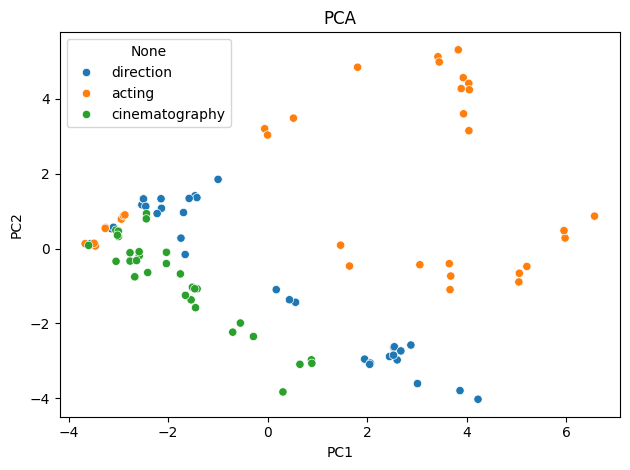

In [349]:
example.pca_figure()

In [350]:
example.dim_red_data()

Saved to figures/


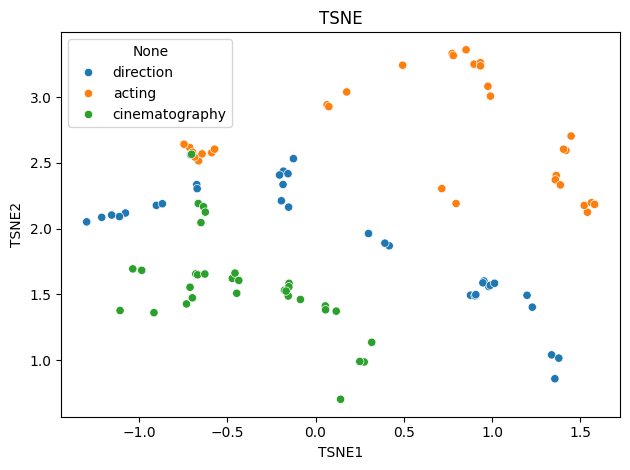

In [351]:
example.tsne_figure()

Saved to figures/


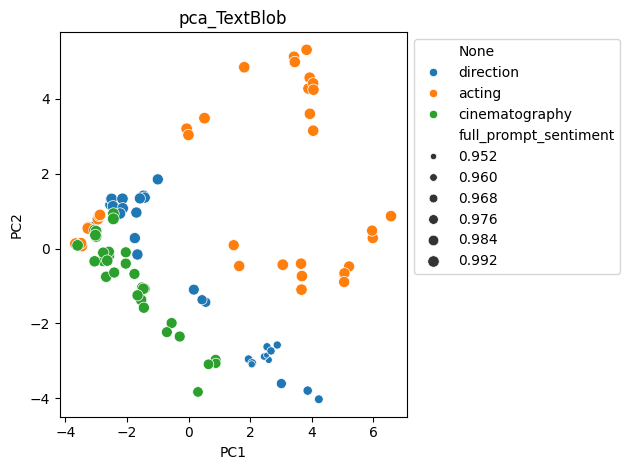

In [352]:
example.text_blob_figure(dim_red)

Saved to figures/


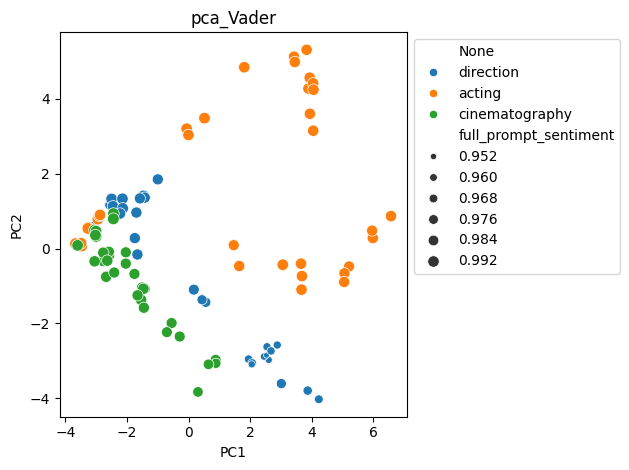

In [353]:
example.vader_figure(dim_red)

In [354]:
dim_red = "tsne"
example = Figure(embeddings, df, dim_red)

Saved to figures/


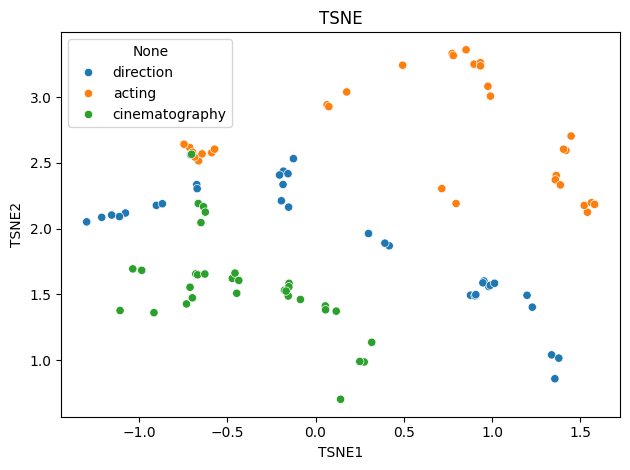

In [355]:
example.tsne_figure()

Saved to figures/


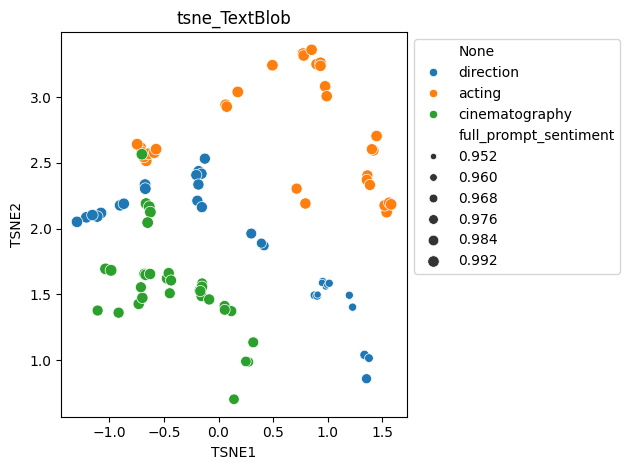

In [356]:
example.text_blob_figure("tsne")

Saved to figures/


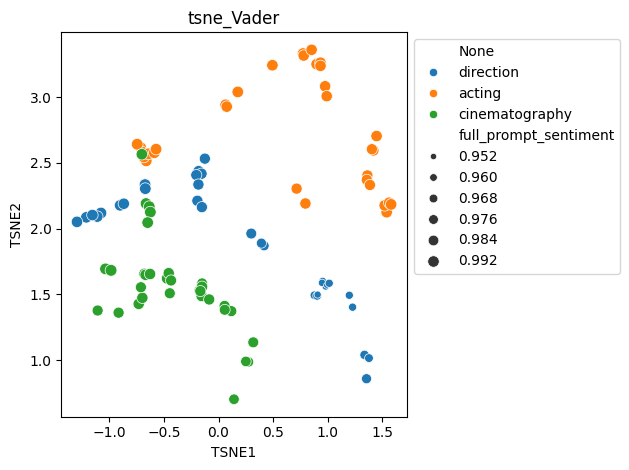

In [357]:
example.vader_figure(dim_red)